<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Context" data-toc-modified-id="Context-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Context</a></span></li><li><span><a href="#Goal" data-toc-modified-id="Goal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Content" data-toc-modified-id="Content-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Content</a></span></li><li><span><a href="#How-you-can-use-the-Data" data-toc-modified-id="How-you-can-use-the-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>How you can use the Data</a></span></li><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Import packages</a></span></li><li><span><a href="#Retrieve-the-data" data-toc-modified-id="Retrieve-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Retrieve the data</a></span></li><li><span><a href="#Explore-one-inspection-batch-and-inspection-report" data-toc-modified-id="Explore-one-inspection-batch-and-inspection-report-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Explore one inspection batch and inspection report</a></span></li><li><span><a href="#Analysis-of-inspection-batches" data-toc-modified-id="Analysis-of-inspection-batches-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Analysis of inspection batches</a></span><ul class="toc-item"><li><span><a href="#Error-analysis" data-toc-modified-id="Error-analysis-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Error analysis</a></span></li><li><span><a href="#Interpolated-Data" data-toc-modified-id="Interpolated-Data-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Interpolated Data</a></span><ul class="toc-item"><li><span><a href="#Standard-Deviation-analysis" data-toc-modified-id="Standard-Deviation-analysis-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Standard Deviation analysis</a></span></li></ul></li></ul></li><li><span><a href="#Create-reports-from-inspections" data-toc-modified-id="Create-reports-from-inspections-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Create reports from inspections</a></span></li><li><span><a href="#Visualize-performance-analysis-for-software-stacks" data-toc-modified-id="Visualize-performance-analysis-for-software-stacks-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Visualize performance analysis for software stacks</a></span><ul class="toc-item"><li><span><a href="#Create-plots" data-toc-modified-id="Create-plots-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Create plots</a></span><ul class="toc-item"><li><span><a href="#Plots-inputs" data-toc-modified-id="Plots-inputs-10.1.1"><span class="toc-item-num">10.1.1&nbsp;&nbsp;</span>Plots inputs</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-10.1.2"><span class="toc-item-num">10.1.2&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#PyTorch" data-toc-modified-id="PyTorch-10.1.3"><span class="toc-item-num">10.1.3&nbsp;&nbsp;</span>PyTorch</a></span></li><li><span><a href="#Tensorflow-vs-Pytorch" data-toc-modified-id="Tensorflow-vs-Pytorch-10.1.4"><span class="toc-item-num">10.1.4&nbsp;&nbsp;</span>Tensorflow vs Pytorch</a></span></li></ul></li></ul></li></ul></div>

# Context

Thoth Performance Dataset is part of a series of datasets related to observations regarding software stacks (e.g. dependency tree, installability, performance, security, health) as part of [Project Thoth](https://thoth-station.ninja/). All these datasets can be found also [here](https://github.com/thoth-station/datasets) where they are described and explored to facilitate their use. All these observations are created with different components which are part of [Project Thoth](https://thoth-station.ninja/) and stored in Thoth Knowledge Graph which is used by [Thoth Adviser](https://github.com/thoth-station/adviser) to provide advises on software stacks depending on User requirements.

# Goal
The goal is to provide datasets widely available and useful for data scientists. Thoth Team within the office of the CTO at Red Hat has collected datasets that can be made open source within the IT domain for training Machine Learning models.

# Content
Thoth Performance Dataset has been created with one of the components of Thoth called [Amun](https://github.com/thoth-station/amun-api). This service acts as an execution engine for Thoth where applications are built and tested using [Thoth Performance Indicators (PI)](https://github.com/thoth-station/performance). Amun can be scheduled through another component in Thoth called [Dependency Monkey](https://github.com/thoth-station/adviser/blob/master/docs/source/dependency_monkey.rst). This component aims to automatically verify software stacks and aggregate relevant observations. Thoth Performance Dataset contains tests on performance for software stacks for different types of applications (e.g Machine Learning).


# How you can use the Data
You can download and use this data for free for your own purpose, all we ask is three things

* you cite Thoth Team as the source if you use the data,
* you accept that you are solely responsible for how you use the data
* you do not sell this data to anyone, it is free!

# Import packages

In [2]:
from thoth.lab import inspection, inspection_report
from thoth.lab import common
import pandas as pd

# Retrieve the data

In [ ]:
FILE_NAME = "thoth-performance-dataset-v1.0.zip"
common.extract_zip_file(FILE_NAME)

In [8]:
inspection_reports = inspection.aggregate_inspection_results()

In [ ]:
inspection_df_dict, inspections_df = inspection.create_inspection_dataframes(inspection_reports)

# Explore one inspection batch and inspection report

Each inspection batch is created using Amun directly or started through Dependency Monkey, which is scheduling different inspection batches,
typically of 100 inspection each. The inputs that can be provided to Amun are:
    
* **Base Image** (e.g. rhel8, ubi8, thoth-ubi8-python36)
* **RPMs/Debian packages List**
* **Pinned Down Software Stack** (Pipfile/Pipfile.lock)
* **Hardware Requirement** (e.g. CPU only, GPU)
* **Performance Indicator (PI) and parameters**

In [4]:
inspection_batch = inspection_reports["performance/inspection-5677206bd89f405055e49a582f52380efd1956e3e3f44f47ccb1ea735bc1f623-6-a58ee823"]
f"Number of inspections in the batch is: {len(inspection_batch)}"

'Number of inspections in the batch is: 75'

In [5]:
inspection_batch_report = inspection_batch[0]

In each report it is possible to find the following info:
* **datetime**, when the solver report has been created;
* **identifier**, Python Inrpreter info;
* **requirements**, e.g Pipfile;
* **requirements_locked** e.g Pipfile.lock;
* **hwinfo**, hardware information where the inspection has been run;
    * **cpu_features**, flags, Frequency, l1, l2 ,l3 cache sizes [KB];
    * **cpu_info**, CPU info (e.g brand, vendor_id, family, model);
    * **cpu_type**, flags identifying CPU Type (e.g. 'is_XEON': True);
    * **platform**;
        * **architecture**;
        * **machine**;
        * **node**;
        * **platform**;
        * **release**;
        * **version**;
        * **processor**;
* **os_release**, OS info taken from `"/etc/os-release"`;
* **runtime_environment**, runtime environment info;
    * **cuda_version**, CUDA version;
    * **hardware**, HW info, cpu family and model;
    * **operating_system**, OS name and version;
    * **python_version**;
* **script_sha256**, unique ID of the Performance Indicator used;
* **stdout**;
    * **@parameters**, parameters specific of the PI;
    * **@results**, results after running the PI (rate[GFLOPS] and elapsed time [ms]);
    * **component**, for what component or library (e.g tensorflow, pytorch);
    * **name**, name of the PI (e.g. PiConv2D);
    * **{component}_buildinfo**, build info for the specific component (e.g AICoE Tensorflow);
* **stderr**;
* **exit_code**;
* **usage** resource usage for a process or child as given by resource.getrusage() https://docs.python.org/3.6/library/resource.html#resource.getrusage;
* **build_log**;

# Analysis of inspection batches

In [6]:
INSPECTION_PARAMETERS_TO_ANALYZE = [
    "elapsed",
    "rate"]

SAVE_RESULTS = None
PROJECT_DIR_NAME = None

## Error analysis

In [10]:
inspection_parameters_df_dict = inspection.create_inspection_parameters_dataframes(
    INSPECTION_PARAMETERS_TO_ANALYZE,
    inspection_df_dict,
    component="tensorflow"
)

In [11]:
inspection.create_plot_multiple_batches(
    data=inspection_parameters_df_dict,
    quantity="elapsed",
    plot_type="box",
    x_label="Elapsed Time [ms]",
    y_label="Count",
    static=False,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="BoxPlots"
)

2020-06-19 11:11:23,966 [558409] INFO     thoth.lab.inspection: Number of plots created: 68


In [12]:
inspection_parameters_df_dict = inspection.create_inspection_parameters_dataframes(
    INSPECTION_PARAMETERS_TO_ANALYZE,
    inspection_df_dict,
    component="pytorch"
)

In [13]:
inspection.create_plot_multiple_batches(
    data=inspection_parameters_df_dict,
    quantity="elapsed",
    plot_type="box",
    x_label="Elapsed Time [ms]",
    y_label="Count",
    static=False,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="BoxPlots"
)

2020-06-19 11:11:31,242 [558409] INFO     thoth.lab.inspection: Number of plots created: 2


## Interpolated Data

### Standard Deviation analysis

In [14]:
inspection_statistics_dict, REDUCED_INSPECTION_BATCH = inspection.evaluate_inspection_statistics(
        INSPECTION_PARAMETERS_TO_ANALYZE,
        inspection_df_dict,
        component="tensorflow"
)

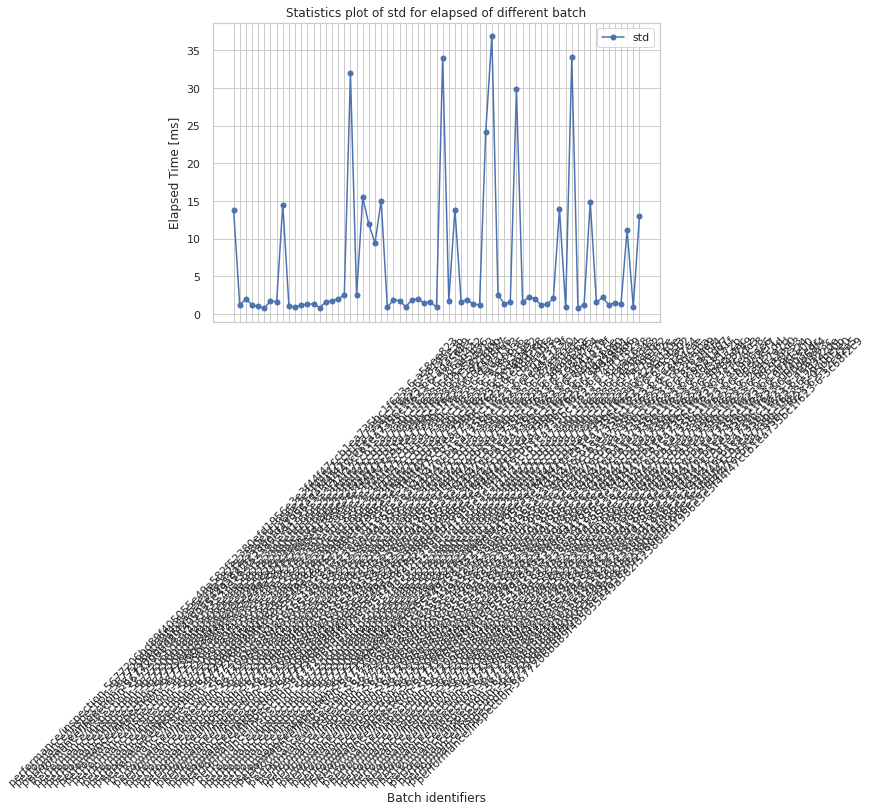

In [15]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["elapsed"],
    colour_list=["b"],
    statistical_quantities=["std"],
    title_plot="Statistics plot of std for elapsed of different batch",
    title_xlabel="Batch identifiers",
    title_ylabel="Elapsed Time [ms]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Statistics")

In [ ]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["elapsed"],
    colour_list=["g", "b", "c", "r", "y"],
    statistical_quantities=["median", "q1", "q3", "max", "min"],
    title_plot="Interpolated statistics for elapsed of different batch",
    title_xlabel="Batch identifiers",
    title_ylabel="Elapsed time [ms]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Interpolations")

In [ ]:
inspection_statistics_dict, REDUCED_INSPECTION_BATCH = inspection.evaluate_inspection_statistics(
        INSPECTION_PARAMETERS_TO_ANALYZE,
        inspection_df_dict,
        component="pytorch"
)

In [ ]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["elapsed"],
    colour_list=["b"],
    statistical_quantities=["std"],
    title_plot="Statistics plot of std for elapsed of different batch",
    title_xlabel="Batch identifiers",
    title_ylabel="Elapsed Time [ms]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Statistics")

In [ ]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["elapsed"],
    colour_list=["g", "b", "c", "r", "y"],
    statistical_quantities=["median", "q1", "q3", "max", "min"],
    title_plot="Interpolated statistics for elapsed of different batch",
    title_xlabel="Batch identifiers",
    title_ylabel="Elapsed time [ms]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Interpolations")

# Create reports from inspections

In [ ]:
dfs_inspection_classes, dfs_unique_inspection_classes = inspection_report.create_dfs_inspection_classes(inspection_df=inspections_df)

In [18]:
inspection_report.multi_table(dfs_unique_inspection_classes["hardware"])

In [19]:
dfs_unique_inspection_classes["software_stack"]
sws_df = dfs_unique_inspection_classes["software_stack"]
sws_df[[col for col in sws_df.columns.values if "__version" in col]].transpose()

,0
requirements_locked__default__tensorflow__version,"[==1.13.1, ==1.0.1, ==1.5.0, ==1.12.2, ==1.1.0..."
requirements_locked__default__protobuf__version,"[==3.10.0, ==3.9.1, ==3.5.2.post1, ==3.9.0, ==..."
requirements_locked__default__tensorboard__version,"[==1.13.0, nan, ==1.12.0, ==1.12.2, ==1.13.1, ..."
requirements_locked__default__termcolor__version,"[==1.1.0, nan]"
requirements_locked__default__keras-preprocessing__version,"[==1.0.9, nan, ==1.0.5, ==1.0.8, ==1.1.0]"
requirements_locked__default__numpy__version,"[==1.17.3, ==1.16.0, ==1.17.2, ==1.14.5, ==1.1..."
requirements_locked__default__keras-applications__version,"[==1.0.7, nan, ==1.0.6, ==1.0.8]"
requirements_locked__default__absl-py__version,"[==0.7.1, nan, ==0.8.1, ==0.1.11, ==0.8.0, ==0..."
requirements_locked__default__markdown__version,"[==3.0.1, nan, ==2.6.8, ==2.6.10, ==2.6.9, ==3..."
requirements_locked__default__six__version,"[==1.10.0, ==1.11.0, ==1.13.0, nan, ==1.12.0]"


In [20]:
dfs_unique_inspection_classes["base_image"]

,os_release__name,os_release__version,os_release__version_id
0,[Red Hat Enterprise Linux],[8.1 (Ootpa)],[8.1]


In [21]:
dfs_unique_inspection_classes["pi"].transpose()

,0
script_sha256,[696a127288f05aa5f2cff4ce713e52eb235bd00a50a84...
stdout__@parameters__batch,[4]
stdout__@parameters__data_format,"[NHWC, NCHW]"
stdout__@parameters__device,[cpu]
stdout__@parameters__dtype,[float32]
stdout__@parameters__filter_height,[20]
stdout__@parameters__filter_width,[5]
stdout__@parameters__input_channels,[1]
stdout__@parameters__input_height,[700]
stdout__@parameters__input_width,[161]


# Visualize performance analysis for software stacks

In [22]:
python_packages_dataframe, python_packages_versions = inspection.create_python_package_df(inspection_df=inspections_df)
python_packages_dataframe

,tensorflow,protobuf,tensorboard,termcolor,keras-preprocessing,numpy,keras-applications,absl-py,markdown,six,...,requests,chardet,urllib3,pyasn1-modules,certifi,idna,rsa,cachetools,oauthlib,pbr
0,"(tensorflow, pypi-org, ==1.13.1)","(protobuf, pypi-org, ==3.10.0)","(tensorboard, pypi-org, ==1.13.0)","(termcolor, pypi-org, ==1.1.0)","(keras-preprocessing, pypi-org, ==1.0.9)","(numpy, pypi-org, ==1.17.3)","(keras-applications, pypi-org, ==1.0.7)","(absl-py, pypi-org, ==0.7.1)","(markdown, pypi-org, ==3.0.1)","(six, pypi-org, ==1.10.0)",...,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )"
1,"(tensorflow, pypi-org, ==1.0.1)","(protobuf, pypi-org, ==3.9.1)","(, , )","(, , )","(, , )","(numpy, pypi-org, ==1.16.0)","(, , )","(, , )","(, , )","(six, pypi-org, ==1.11.0)",...,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )"
2,"(tensorflow, pypi-org, ==1.5.0)","(protobuf, pypi-org, ==3.9.1)","(, , )","(, , )","(, , )","(numpy, pypi-org, ==1.17.2)","(, , )","(absl-py, pypi-org, ==0.8.1)","(markdown, pypi-org, ==3.0.1)","(six, pypi-org, ==1.10.0)",...,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )"
3,"(tensorflow, pypi-org, ==1.12.2)","(protobuf, pypi-org, ==3.9.1)","(tensorboard, pypi-org, ==1.12.0)","(termcolor, pypi-org, ==1.1.0)","(keras-preprocessing, pypi-org, ==1.0.5)","(numpy, pypi-org, ==1.14.5)","(keras-applications, pypi-org, ==1.0.7)","(absl-py, pypi-org, ==0.1.11)","(markdown, pypi-org, ==2.6.8)","(six, pypi-org, ==1.10.0)",...,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )"
4,"(tensorflow, pypi-org, ==1.1.0)","(protobuf, pypi-org, ==3.5.2.post1)","(, , )","(, , )","(, , )","(numpy, pypi-org, ==1.17.2)","(, , )","(, , )","(, , )","(six, pypi-org, ==1.10.0)",...,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,"(tensorflow, pypi-org, ==1.9.0)","(protobuf, pypi-org, ==3.9.1)","(tensorboard, pypi-org, ==1.8.0)","(termcolor, pypi-org, ==1.1.0)","(, , )","(numpy, pypi-org, ==1.16.0)","(, , )","(absl-py, pypi-org, ==0.2.1)","(markdown, pypi-org, ==2.6.8)","(six, pypi-org, ==1.12.0)",...,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )"
66,"(tensorflow, pypi-org, ==1.12.2)","(protobuf, pypi-org, ==3.9.1)","(tensorboard, pypi-org, ==1.12.2)","(termcolor, pypi-org, ==1.1.0)","(keras-preprocessing, pypi-org, ==1.1.0)","(numpy, pypi-org, ==1.17.4)","(keras-applications, pypi-org, ==1.0.6)","(absl-py, pypi-org, ==0.4.1)","(markdown, pypi-org, ==3.1)","(six, pypi-org, ==1.11.0)",...,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )"
67,"(tensorflow, pypi-org, ==1.7.1)","(protobuf, pypi-org, ==3.6.0)","(tensorboard, pypi-org, ==1.6.0)","(termcolor, pypi-org, ==1.1.0)","(, , )","(numpy, pypi-org, ==1.15.0)","(, , )","(absl-py, pypi-org, ==0.2.0)","(markdown, pypi-org, ==3.0.1)","(six, pypi-org, ==1.10.0)",...,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )"
68,"(tensorflow, pypi-org, ==1.12.3)","(protobuf, pypi-org, ==3.6.1)","(tensorboard, pypi-org, ==1.12.0)","(termcolor, pypi-org, ==1.1.0)","(keras-preprocessing, pypi-org, ==1.0.5)","(numpy, pypi-org, ==1.15.4)","(keras-applications, pypi-org, ==1.0.6)","(absl-py, pypi-org, ==0.8.0)","(markdown, pypi-org, ==2.6.8)","(six, pypi-org, ==1.13.0)",...,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )"


In [24]:
final_dataframe = inspection.create_final_dataframe(
    packages_versions=python_packages_versions,
    python_packages_dataframe=python_packages_dataframe,
    inspection_df=inspections_df
)

## Create plots

### Plots inputs

In [25]:
LIMIT_RESULTS = True
PROJECT_DIR_NAME = "demo"
STATIC_FIGURE = True
SAVE_RESULTS = False
IDENTIFIERS_INSPECTION = '5677206bd89f405055e49a582f52380efd1956e3e3f44f47ccb1ea735bc1f623'

PI_NAME = 'PiConv2D'
RUNTIME_ENVIRONMENT = "rhel-8.1-py36"

### TensorFlow

In [26]:
PI_COMPONENT = "tensorflow"
PYTHON_PACKAGES = None

plot_df = inspection.create_filtered_df(
    df=final_dataframe,
    pi_name=PI_NAME,
    pi_component=PI_COMPONENT,
    runtime_environment=RUNTIME_ENVIRONMENT,
    packages=PYTHON_PACKAGES
)

2020-06-19 11:15:09,233 [558409] INFO     thoth.lab.inspection: Number of software stacks identified: 68


In [27]:
inspection.create_inspection_3d_plot(plot_df=plot_df, quantity="elapsed_time", identifiers_inspections=IDENTIFIERS_INSPECTION)

2020-06-19 11:15:13,034 [558409] WARNING  matplotlib.axes._axes: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


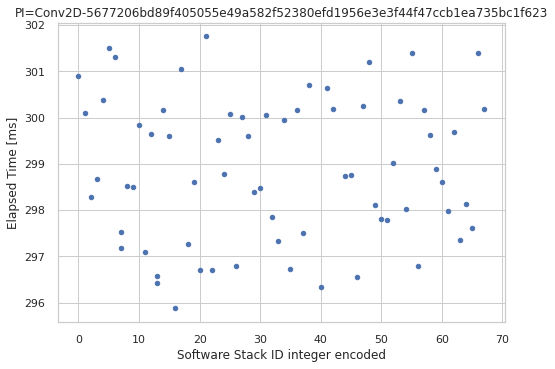

In [28]:
inspection.create_plot_from_df(
    plot_df,
    columns= ["sws_hash_id_encoded","elapsed_time"],
    title_plot=f"PI=Conv2D-{IDENTIFIERS_INSPECTION}",
    x_label="Software Stack ID integer encoded", 
    y_label="Elapsed Time [ms]",
    static=STATIC_FIGURE,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="InspectionPlots",
    scatter=True
)

### PyTorch

In [29]:
PI_COMPONENT = "pytorch"
PYTHON_PACKAGES = None

plot_df = inspection.create_filtered_df(
    df=final_dataframe,
    pi_name=PI_NAME,
    pi_component=PI_COMPONENT,
    runtime_environment=RUNTIME_ENVIRONMENT,
    packages=PYTHON_PACKAGES
)

2020-06-19 11:15:14,342 [558409] INFO     thoth.lab.inspection: Number of software stacks identified: 2


In [30]:
inspection.create_inspection_3d_plot(plot_df=plot_df, quantity="elapsed_time", identifiers_inspections=IDENTIFIERS_INSPECTION)

2020-06-19 11:15:16,074 [558409] WARNING  matplotlib.axes._axes: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


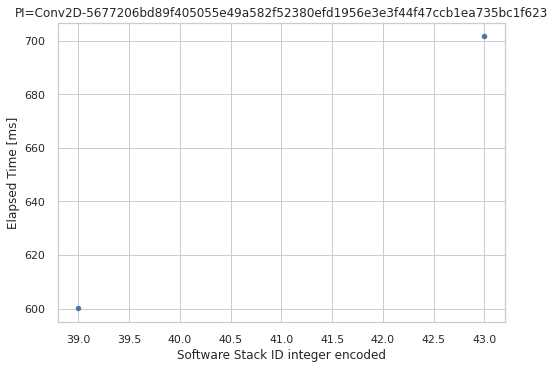

In [31]:
inspection.create_plot_from_df(
    plot_df,
    columns= ["sws_hash_id_encoded","elapsed_time"],
    title_plot=f"PI=Conv2D-{IDENTIFIERS_INSPECTION}",
    x_label="Software Stack ID integer encoded", 
    y_label="Elapsed Time [ms]",
    static=STATIC_FIGURE,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="InspectionPlots",
    scatter=True
)

### Tensorflow vs Pytorch

In [32]:
PYTHON_PACKAGES = None
PI_COMPONENT = None

plot_df = inspection.create_filtered_df(
    df=final_dataframe,
    pi_name=PI_NAME,
    pi_component=PI_COMPONENT,
    runtime_environment=RUNTIME_ENVIRONMENT,
    packages=PYTHON_PACKAGES
)

2020-06-19 11:15:17,653 [558409] INFO     thoth.lab.inspection: Number of software stacks identified: 70


In [33]:
inspection.create_inspection_3d_plot(plot_df=plot_df, quantity="elapsed_time", identifiers_inspections=IDENTIFIERS_INSPECTION)

2020-06-19 11:15:19,758 [558409] WARNING  matplotlib.axes._axes: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


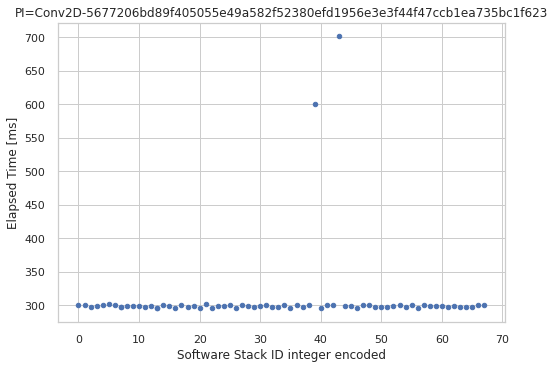

In [34]:
inspection.create_plot_from_df(
    plot_df,
    columns= ["sws_hash_id_encoded","elapsed_time"],
    title_plot=f"PI=Conv2D-{IDENTIFIERS_INSPECTION}",
    x_label="Software Stack ID integer encoded", 
    y_label="Elapsed Time [ms]",
    static=STATIC_FIGURE,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="InspectionPlots",
    scatter=True
)

In [35]:
inspection.create_inspection_2d_plot(plot_df=plot_df, quantity="elapsed_time", components=["pytorch", "tensorflow"], color_scales=["YlOrRd", "Greens"], identifiers_inspections=IDENTIFIERS_INSPECTION)